In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200

# Basic model

$$
    \frac{dI}{dt} = \beta I
$$

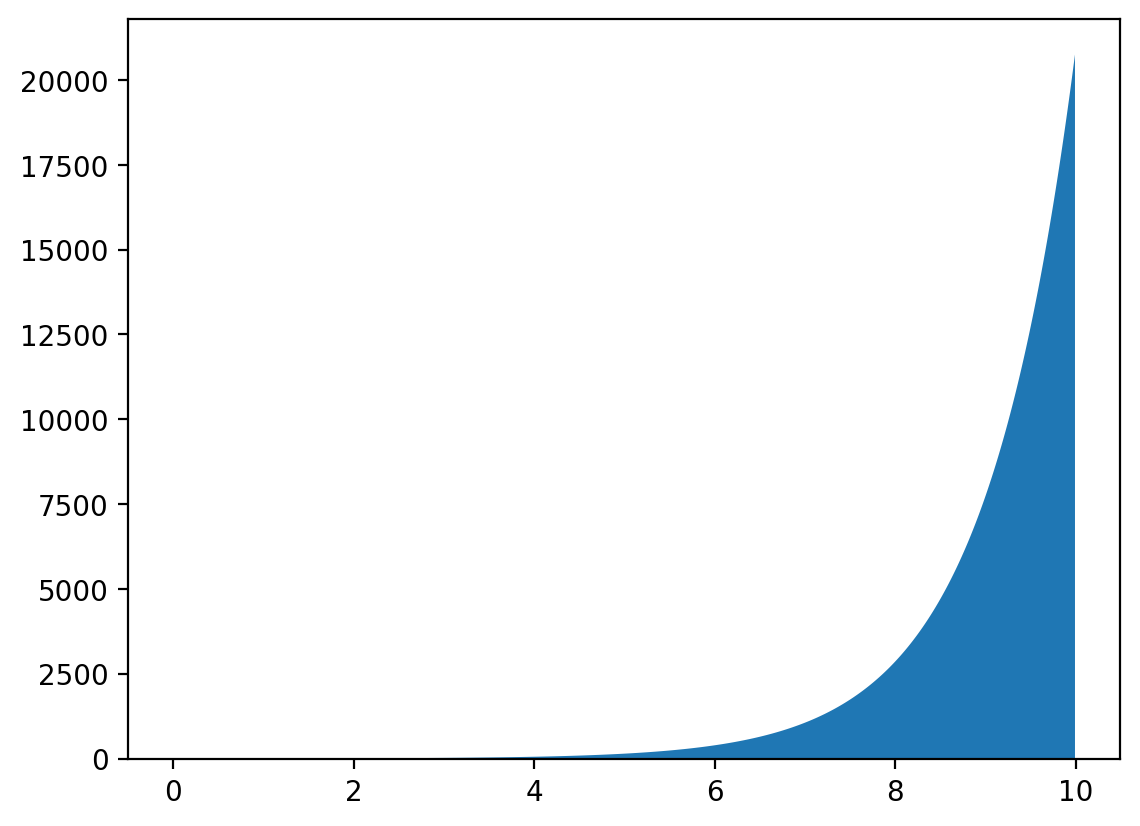

In [37]:
dt = 0.01
beta = 1.0
i = 1.0
steps = 1000

history = []
for _ in range(steps):
    history.append(i)
    i += i * beta * dt

plt.stackplot([t * dt for t in range(steps)], history)
plt.show()

# Adding immunity

\begin{align}
    \frac{dS}{dt} &= -\beta IS \\
    \frac{dI}{dt} &= \beta IS - \gamma I
\end{align}

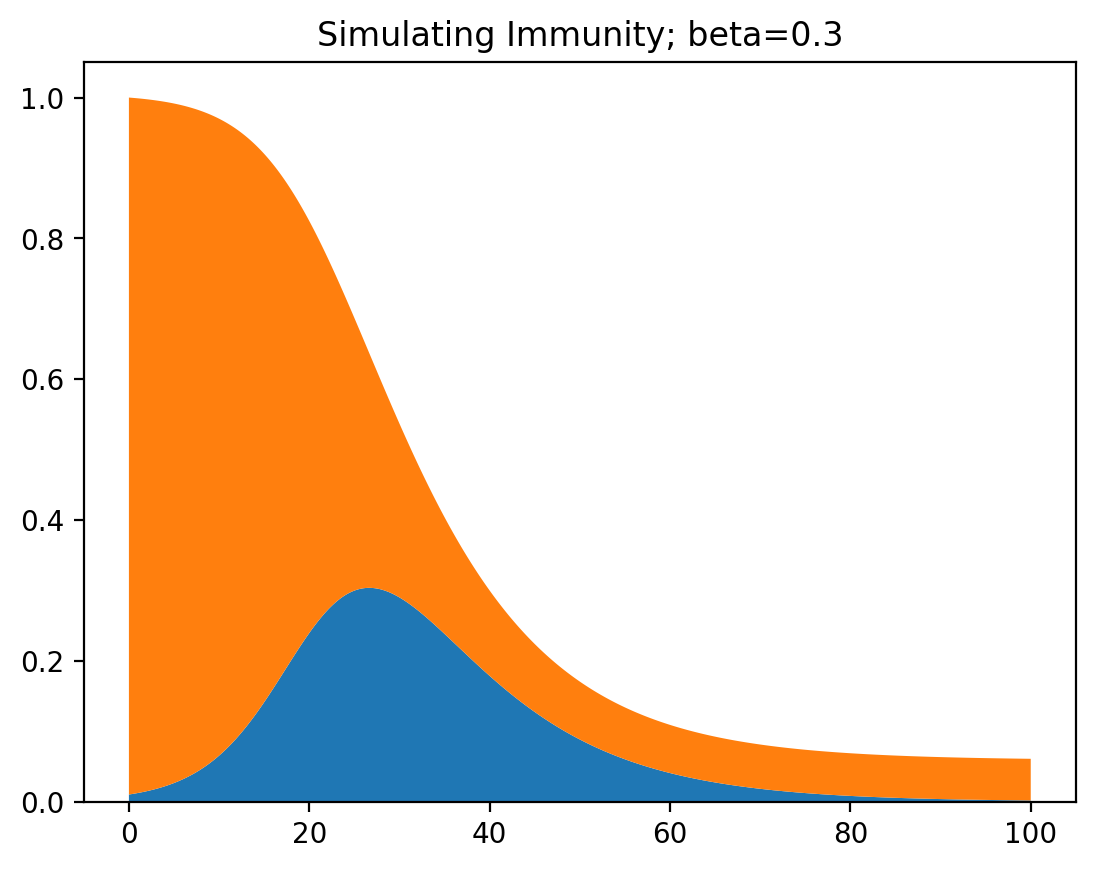

In [38]:
dt = 0.01
beta = 0.3
gamma = 0.1
s = 0.99
i = 0.01
steps = 10000

history = [[], []]
for _ in range(steps):
    history[0].append(i)
    history[1].append(s)
    s += -beta * i * s * dt
    i += (beta * i * s - gamma * i) * dt

plt.title(f"Simulating Immunity; beta={beta}")
plt.stackplot([t * dt for t in range(steps)], history)
plt.show()

# Variants

\begin{align}
    \frac{dI_1}{dt} &= \beta_1 I_1 \\
    \frac{dI_2}{dt} &= \beta_2 I_2
\end{align}

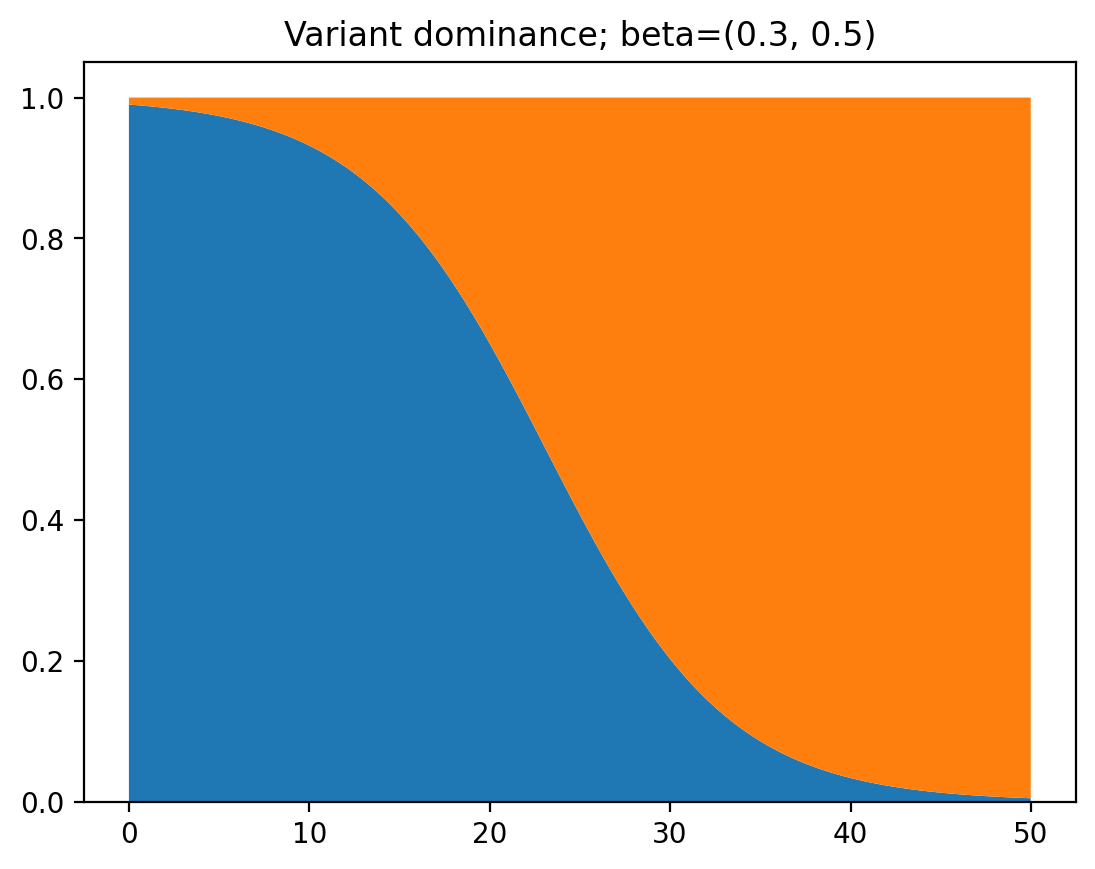

In [41]:
dt = 0.01
beta = 0.3, 0.5
i = 1.0, 0.01
steps = 5000

history = [[], []]
for _ in range(steps):
    history[0].append(i[0] / (i[0] + i[1]))
    history[1].append(i[1] / (i[0] + i[1]))
    i = i[0] + beta[0] * i[0] * dt, i[1] + beta[1] * i[1] * dt

plt.title(f"Variant dominance; beta={beta}")
plt.stackplot([t * dt for t in range(steps)], history)
plt.show()

# Variants with immunity

\begin{align}
    \frac{dS}{dt} &= -\beta_1 I_1 S - \beta_2 I_2 S \\
    \frac{dI_1}{dt} &= \beta_1 I_1 S - \gamma I_1 \\
    \frac{dI_2}{dt} &= \beta_2 I_2 S - \gamma I_2 \\
\end{align}

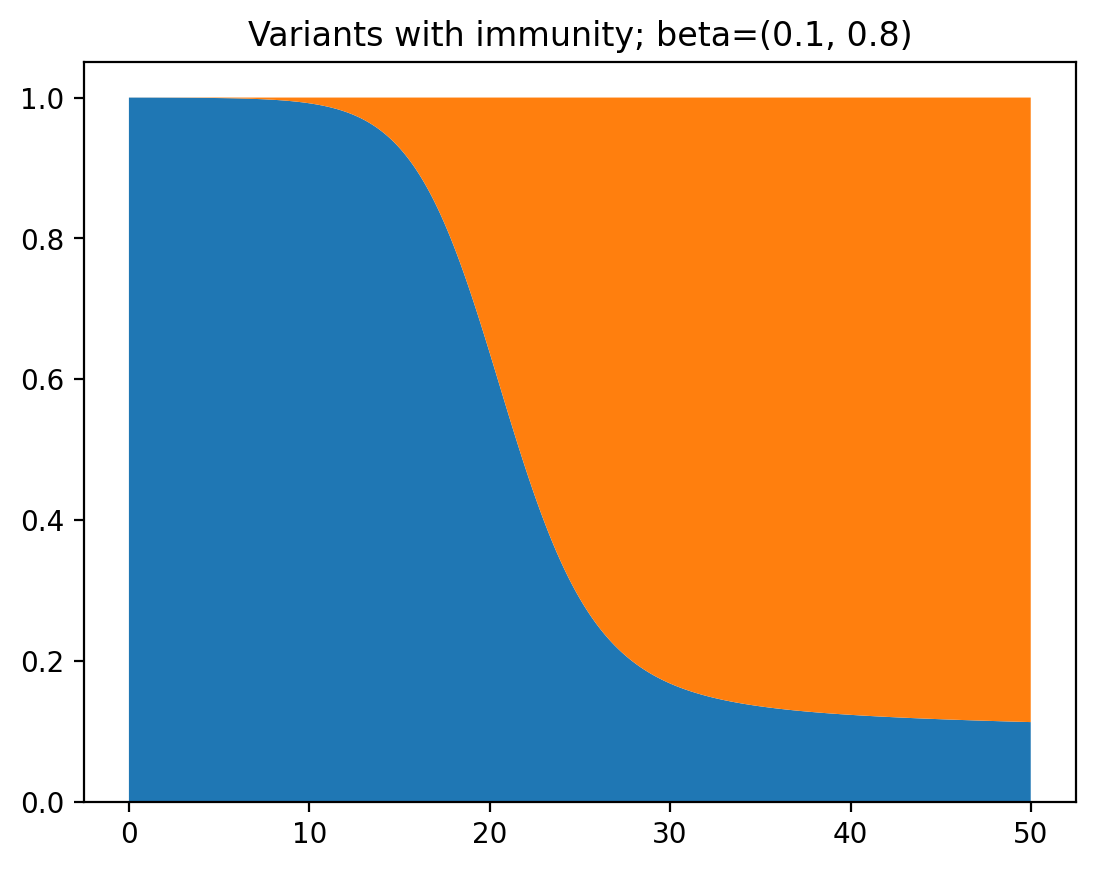

In [68]:
dt = 0.01
beta = 0.1, 0.8
gamma = 0.1
i = [0.2, 0.00001]
s = 1.0 - i[0] - i[1]
steps = 5000

history = [[], []]
for _ in range(steps):
    s += (-beta[0] * i[0] * s - beta[1] * i[1] * s) * dt
    i[0] += (beta[0] * i[0] * s - gamma * i[0]) * dt
    i[1] += (beta[1] * i[1] * s - gamma * i[1]) * dt
    history[0].append(i[0] / (i[0] + i[1]))
    history[1].append(i[1] / (i[0] + i[1]))

plt.title(f"Variants with immunity; beta={beta}")
plt.stackplot([t * dt for t in range(len(history[0]))], history)
plt.show()